In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


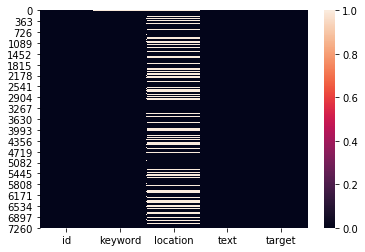

In [3]:
#heatmap to visualize the null values
sns.heatmap(train.isnull())

In [4]:
#to find unique values in each column
print("Number of unique values of the keyword column: {}".format(train['keyword'].nunique()))
print("Number of unique values of the location column: {}".format(train['location'].nunique()))

Number of unique values of the keyword column: 221
Number of unique values of the location column: 3341


In [5]:
#To find anomaly in location column
train[train['location']=='M!$$!$$!PP!']['location']

3192    M!$$!$$!PP!
Name: location, dtype: object

In [6]:
#To delete the location column with missing values 
train = train.drop('location', axis=1)

In [7]:
#Unique values of keyword
train['keyword'].unique()

array([nan, 'ablaze', 'accident', 'aftershock', 'airplane%20accident',
       'ambulance', 'annihilated', 'annihilation', 'apocalypse',
       'armageddon', 'army', 'arson', 'arsonist', 'attack', 'attacked',
       'avalanche', 'battle', 'bioterror', 'bioterrorism', 'blaze',
       'blazing', 'bleeding', 'blew%20up', 'blight', 'blizzard', 'blood',
       'bloody', 'blown%20up', 'body%20bag', 'body%20bagging',
       'body%20bags', 'bomb', 'bombed', 'bombing', 'bridge%20collapse',
       'buildings%20burning', 'buildings%20on%20fire', 'burned',
       'burning', 'burning%20buildings', 'bush%20fires', 'casualties',
       'casualty', 'catastrophe', 'catastrophic', 'chemical%20emergency',
       'cliff%20fall', 'collapse', 'collapsed', 'collide', 'collided',
       'collision', 'crash', 'crashed', 'crush', 'crushed', 'curfew',
       'cyclone', 'damage', 'danger', 'dead', 'death', 'deaths', 'debris',
       'deluge', 'deluged', 'demolish', 'demolished', 'demolition',
       'derail', 'der

In [8]:
#Replacing Nan values
train['keyword'].fillna(value='Unknown', inplace=True)

In [9]:
#Adding two columns to length of tweets and length of keywords
train['length_tweet'] = train['text'].apply(len)
train['length_keyword'] = train['keyword'].apply(len)

In [10]:
#Function to count the number of hashtags 
def count_ht(tweet):
    ht = 0
    for char in tweet:
        if char == '#':
            ht +=1
    return ht
#Creating text column
train['ht_number'] = train['text'].apply(count_ht)

In [11]:
train.head()

,id,keyword,text,target,length_tweet,length_keyword,ht_number
0,1,Unknown,Our Deeds are the Reason of this #earthquake M...,1,69,7,1
1,4,Unknown,Forest fire near La Ronge Sask. Canada,1,38,7,0
2,5,Unknown,All residents asked to 'shelter in place' are ...,1,133,7,0
3,6,Unknown,"13,000 people receive #wildfires evacuation or...",1,65,7,1
4,7,Unknown,Just got sent this photo from Ruby #Alaska as ...,1,88,7,2


In [15]:
import string
from nltk.corpus import stopwords

In [16]:
#Tokenizing
def text_process(tw):
    """
    :tw: Text(string) 
    Returns a list for each tweet as a list of each word count in the tweet.
    """
    
    nopunc = [char for char in tw if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [17]:
#Vectorization
from sklearn.feature_extraction.text import CountVectorizer
bowt = CountVectorizer(analyzer=text_process)
bowt.fit(train['text'])

CountVectorizer(analyzer=<function text_process at 0x0000028E0F3A4678>,
                binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

Let's see how many unique word are we dealing with...

In [23]:
train.head()

,id,keyword,target,length_tweet,length_keyword,ht_number,0,1,2,3,...,26463,26464,26465,26466,26467,26468,26469,26470,26471,26472
0,1,Unknown,1,69,7,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,Unknown,1,38,7,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,Unknown,1,133,7,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,Unknown,1,65,7,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,Unknown,1,88,7,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
